In [62]:
import pandas  as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [63]:
df=pd.read_csv('wine.csv')

In [64]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [65]:
#Basic Analysis

In [66]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [67]:
df.shape

(178, 14)

In [68]:
df.size

2492

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [70]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [71]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [72]:
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [73]:
df.duplicated().sum()

0

<Axes: xlabel='Type', ylabel='Alcohol'>

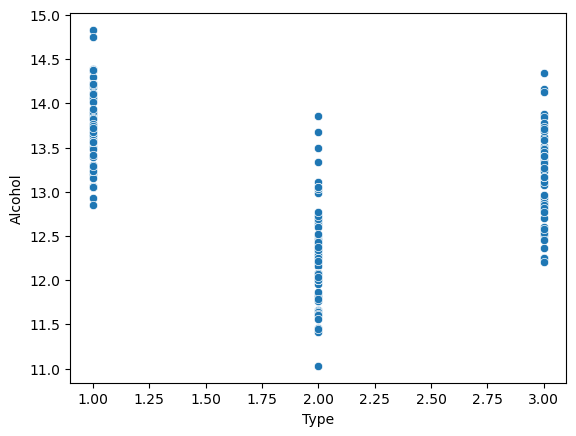

In [74]:
sns.scatterplot(df,x='Type',y='Alcohol')

<Axes: >

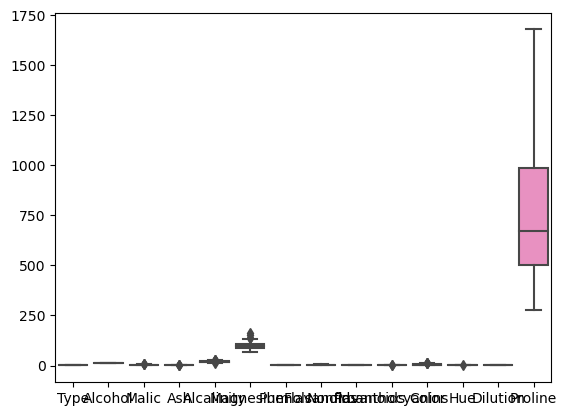

In [75]:
sns.boxplot(df)

<Axes: >

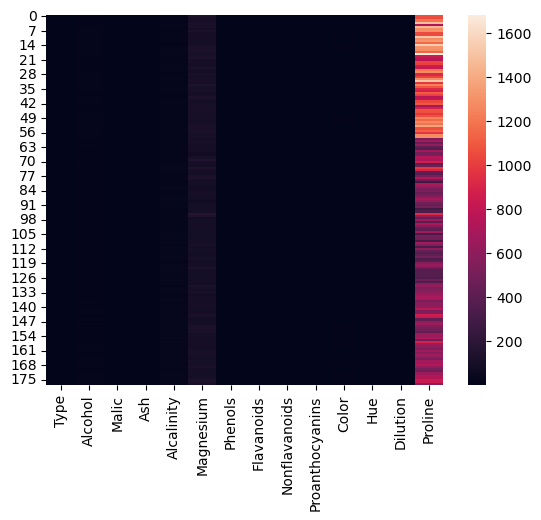

In [76]:
sns.heatmap(df)

In [77]:
df[['Type','Alcohol']].corr()

,Type,Alcohol
Type,1.000000,-0.328222
Alcohol,-0.328222,1.000000


<Axes: >

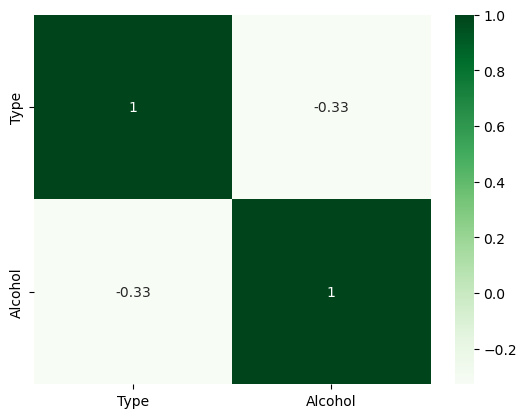

In [78]:
sns.heatmap(df[['Type','Alcohol']].corr(),annot=True,cmap='Greens')

In [79]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [80]:
features=df.drop('Type',axis=1)

In [81]:
kmeans=KMeans(n_clusters=3)

In [82]:
kmeans.fit(features)

KMeans(n_clusters=3)

In [83]:
cluster.labels_

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

In [84]:
np.unique(cluster.labels_)

array([0, 1, 2])

In [85]:
cluster.labels_.shape

(178,)

In [86]:
df['cluster']=cluster.labels_

In [87]:
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [88]:
df[df.cluster==0]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.950000,1.05,1.82,520,0
61,2,12.64,1.36,2.02,16.8,100,2.02,1.41,0.53,0.62,5.750000,0.98,1.59,450,0
63,2,12.37,1.13,2.16,19.0,87,3.50,3.10,0.19,1.87,4.450000,1.22,2.87,420,0
64,2,12.17,1.45,2.53,19.0,104,1.89,1.75,0.45,1.03,2.950000,1.45,2.23,355,0
66,2,13.11,1.01,1.70,15.0,78,2.98,3.18,0.26,2.28,5.300000,1.12,3.18,502,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3,12.85,3.27,2.58,22.0,106,1.65,0.60,0.60,0.96,5.580000,0.87,2.11,570,0
165,3,13.73,4.36,2.26,22.5,88,1.28,0.47,0.52,1.15,6.620000,0.78,1.75,520,0
170,3,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.500000,0.66,1.83,510,0
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470,0


In [89]:
df[df.cluster==1]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,1
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,1
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,1
10,1,14.10,2.16,2.30,18.0,105,2.95,3.32,0.22,2.38,5.75,1.25,3.17,1510,1


In [90]:
df[df.cluster==2]

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,cluster
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845,2
20,1,14.06,1.63,2.28,16.0,126,3.00,3.17,0.24,2.10,5.65,1.09,3.71,780,2
21,1,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,2
24,1,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,14.16,2.51,2.48,20.0,91,1.68,0.70,0.44,1.24,9.70,0.62,1.71,660,2
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2


In [93]:
cluster.cluster_centers_

array([[1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02]])

In [95]:
cluster.inertia_

2370689.686782969

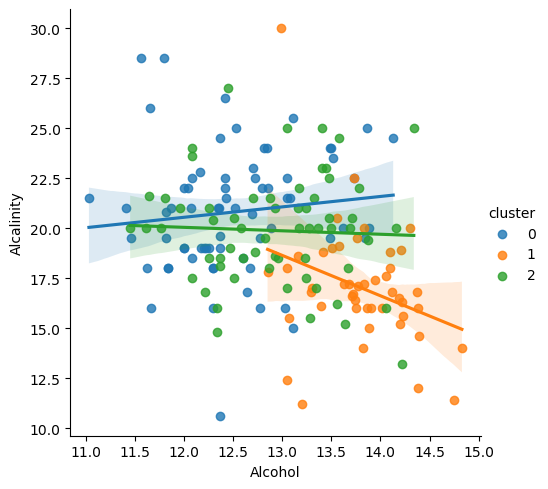

In [97]:
sns.lmplot(data=df,x='Alcohol',y='Alcalinity',hue='cluster')

# Elbow method

In [98]:
inertia=[]
no_clusters=range(10)

In [99]:
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)
    print(inertia)

[17592296.383508474]
[17592296.383508474, 4543749.614531861]
[17592296.383508474, 4543749.614531861, 2370689.686782969]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718, 916379.1871539169]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718, 916379.1871539169, 647326.0020260848]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718, 916379.1871539169, 647326.0020260848, 414752.87383925024]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718, 916379.1871539169, 647326.0020260848, 414752.87383925024, 323211.5526346544]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718, 916379.1871539169, 647326.0020260848, 414752.87383925024, 323211.5526346544, 270155.6963730623]
[17592296.383508474, 4543749.614531861, 2370689.686782969, 1331903.062263718, 916379.1871539169, 647326.0020260848, 414752.8

Text(0.5, 1.0, 'Elbow Method')

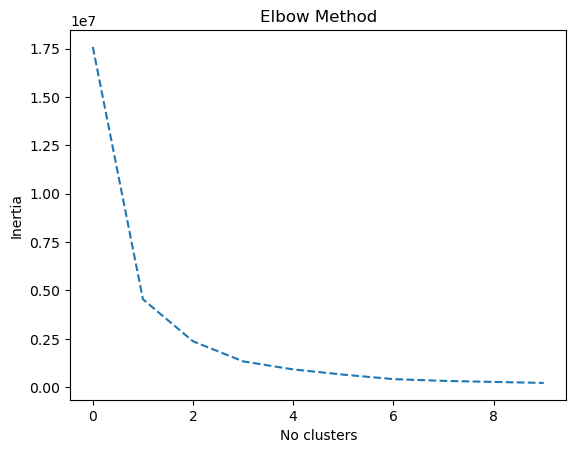

In [100]:
plt.plot(no_clusters,inertia,linestyle='--')
plt.xlabel('No clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [113]:
silhouette_score(features,cluster.labels_)

0.5711566129967663

In [102]:
target=df['Type']

In [104]:
features=df.drop('Type',axis=1)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)

In [106]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(133, 14)
(133,)
(45, 14)
(45,)


In [122]:
pca=PCA(n_components=3)

In [123]:
pca.fit(x_train)
pca.fit(x_test)

PCA(n_components=3)

In [124]:
x_train_new=pca.transform(x_train)
x_test_new=pca.transform(x_test)

In [125]:
print(x_train_new.shape,x_test_new.shape)

(133, 3) (45, 3)


In [126]:
pca.explained_variance_ratio_

array([9.95780959e-01, 3.96751214e-03, 1.55210880e-04])

In [127]:
scores_pca=pca.transform(x_test)
scores_pca

array([[-4.67385204e+00, -1.61071374e+01, -3.12362836e-01],
       [-6.45763880e+01, -1.00149502e+01,  6.86315221e+00],
       [ 5.95443781e+02, -1.57725406e+01,  1.25159544e-01],
       [ 2.01597914e+02, -2.73560283e+00, -1.77465110e-01],
       [-2.44336091e+01, -1.65620089e+00,  9.40421308e+00],
       [-1.34144043e+02,  1.51152527e+01,  3.98887215e+00],
       [-2.78537991e+02, -7.41340567e+00, -4.14986945e+00],
       [-5.87833321e+01,  3.48236566e+01, -1.43302416e+00],
       [-2.04681394e+02, -1.56914085e+01, -3.24012591e+00],
       [ 2.53674863e+02,  5.72891091e+01, -2.61906759e+00],
       [-3.46333625e+01, -1.46801550e+01, -8.33020760e-01],
       [-6.40611498e+00, -2.15418787e+00, -1.55300372e+00],
       [-2.14598023e+02, -1.05034559e+01,  3.13868125e+00],
       [-1.64585642e+02, -9.32908458e+00,  3.04707933e+00],
       [-5.41880975e+01,  1.28099747e+01,  6.05046150e+00],
       [ 6.25737784e+02,  7.01138217e-01,  1.81002200e+00],
       [ 1.45617822e+02, -7.87976977e-01